In [1]:
import numpy as np
import matplotlib.pyplot as plt

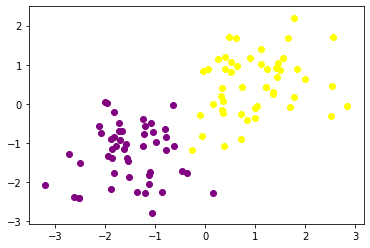

In [2]:
# Generating the data points
mu1 = np.array([-1.5,-1.25])
mu2 = np.array([1.0,0.5])
cov1 = np.array([[0.5,0],[0,0.5]])
cov2 = np.array([[0.5,0],[0,0.5]])
data1 = np.random.multivariate_normal(mu1,cov1,50)
data2 = np.random.multivariate_normal(mu2,cov2,50)
# Plotting the data points
plt.scatter(data1[:,0],data1[:,1],color = 'purple')
plt.scatter(data2[:,0],data2[:,1],color = 'yellow')
plt.show()

In [3]:
# Gaussian MLE estimate
# For purple set of points
m1 = np.sum(data1,axis = 0)/data1.shape[0]
v1 = np.zeros([m1.shape[0],m1.shape[0]])
for i in range(0,data1.shape[0]):
    temp = data1[i]-m1
    temp = np.reshape(temp,[1,temp.shape[0]])
    v1+=temp.T@temp
v1 = v1/data1.shape[0]
print("Mean =",m1)
print("Covariance =")
print(v1)

Mean = [-1.51753739 -1.26867316]
Covariance =
[[0.42956086 0.01650969]
 [0.01650969 0.51635408]]


In [4]:
# Gaussian MLE estimate
# For yellow set of points
m2 = np.sum(data2,axis = 0)/data2.shape[0]
v2 = np.zeros([m2.shape[0],m2.shape[0]])
for i in range(0,data2.shape[0]):
    temp = data2[i]-m2
    temp = np.reshape(temp,[1,temp.shape[0]])
    v2+=temp.T@temp
v2 = v2/data2.shape[0]
print("Mean =",m2)
print("Covariance =")
print(v2)

Mean = [0.99338155 0.48882961]
Covariance =
[[0.55170443 0.13966743]
 [0.13966743 0.57992579]]


In [5]:
def gaus1(x):
    res = (1/(np.sqrt(2*np.pi)*np.linalg.det(v1)))*np.exp(-0.5*(x-m1).T@np.linalg.inv(v1)@(x-m1))
    return res

In [6]:
def gaus2(x):
    res = (1/(np.sqrt(2*np.pi)*np.linalg.det(v2)))*np.exp(-0.5*(x-m2).T@np.linalg.inv(v2)@(x-m2))
    return res

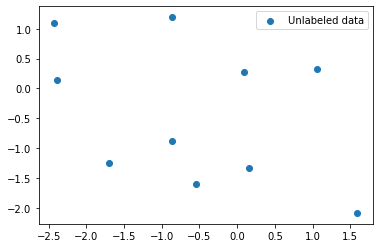

In [7]:
# Creating the unlabeled new data points
xt = np.random.uniform(low = -3,high = 2,size = 10)
yt = np.random.uniform(low = -2.5,high = 1.5,size = 10)
plt.scatter(xt,yt,label = 'Unlabeled data')
plt.legend()
plt.show()

The points after classification are


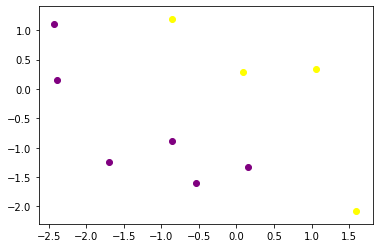

In [8]:
# Predicting the new data points as purple or yellow
res1 = []
res2 = []
for i in range(0,xt.shape[0]):
    if(gaus1([xt[i],yt[i]])>gaus2([xt[i],yt[i]])):
        res1.append([xt[i],yt[i]])
    else:
        res2.append([xt[i],yt[i]])
res1 = np.array(res1)
res2 = np.array(res2)
print("The points after classification are")
plt.scatter(res1[:,0],res1[:,1],color = 'purple')
plt.scatter(res2[:,0],res2[:,1],color = 'yellow')
plt.show()